In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1 DATA LOADING AND CLEANING

In [8]:
df = pd.read_csv(r"C:\Users\USER\Downloads\covid_large_dataset.csv")

In [9]:
df.head()

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted
0,2020-01-01,USA,5261,82,4849,328,8132
1,2020-01-02,USA,742,29,547,165,1451
2,2020-01-03,USA,1519,51,1277,190,2094
3,2020-01-04,USA,321,15,225,79,444
4,2020-01-05,USA,401,12,322,67,464


# 2 CHECKING DATATYPES

In [10]:
df.dtypes

Date               object
Country            object
Confirmed_Cases     int64
Deaths              int64
Recovered           int64
Active_Cases        int64
Tests_Conducted     int64
dtype: object

# 3 CONVERTING DATE OBJECT TO DATETIME

In [11]:
df['Date'] = pd.to_datetime (df['Date'])

In [12]:
df.dtypes

Date               datetime64[ns]
Country                    object
Confirmed_Cases             int64
Deaths                      int64
Recovered                   int64
Active_Cases                int64
Tests_Conducted             int64
dtype: object

# 4 CHECKING NULL VALUES

In [13]:
df.isnull().sum()

Date               0
Country            0
Confirmed_Cases    0
Deaths             0
Recovered          0
Active_Cases       0
Tests_Conducted    0
dtype: int64

# 5 CHECKING DUPLICATE VALUES

In [14]:
df.duplicated().sum()

0

# 6 DATA ANALYSIS

In [15]:
df['Daily_Confirmed'] = df.groupby('Country')['Confirmed_Cases'].diff().fillna(0)
df['Daily_Deaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
df['Daily_Recovered'] = df.groupby('Country')['Recovered'].diff().fillna(0)

In [16]:
df.head()

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Daily_Confirmed,Daily_Deaths,Daily_Recovered
0,2020-01-01,USA,5261,82,4849,328,8132,0.0,0.0,0.0
1,2020-01-02,USA,742,29,547,165,1451,-4519.0,-53.0,-4302.0
2,2020-01-03,USA,1519,51,1277,190,2094,777.0,22.0,730.0
3,2020-01-04,USA,321,15,225,79,444,-1198.0,-36.0,-1052.0
4,2020-01-05,USA,401,12,322,67,464,80.0,-3.0,97.0


In [17]:
# Calculate the case fatality rate (Deaths/Confirmed Cases) for each country
df['Fatality_Rate'] = df['Deaths'] / df['Confirmed_Cases'] * 100


In [18]:
# Group data by country and calculate the average fatality rate
fatality_rate_by_country = df.groupby('Country')['Fatality_Rate'].mean().round(2).sort_values(ascending=False)

In [19]:
fatality_rate_by_country

Country
Germany    2.96
Russia     2.96
UK         2.95
Spain      2.94
China      2.93
India      2.93
USA        2.93
Italy      2.92
France     2.91
Brazil     2.90
Name: Fatality_Rate, dtype: float64

# HIGHEST FATALITY RATE

In [20]:
fatality_rate_by_country.head(1)

Country
Germany    2.96
Name: Fatality_Rate, dtype: float64

# LOWEST FATALITY RATE

In [21]:
fatality_rate_by_country.tail(1)

Country
Brazil    2.9
Name: Fatality_Rate, dtype: float64

# RECOVERY RATE FOR EACH COUNTRY

In [22]:
# Calculate recovery rate for each country (Recovered/Confirmed Cases)
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed_Cases'] * 100

In [23]:
recovery_rate_by_country = df.groupby('Country')['Recovery_Rate'].mean().round(2)

In [24]:
recovery_rate_by_country

Country
Brazil     82.72
China      82.52
France     82.59
Germany    82.53
India      82.39
Italy      82.43
Russia     82.38
Spain      82.66
UK         82.75
USA        82.57
Name: Recovery_Rate, dtype: float64

# DAILY CONFIRMED CASES FOR 3 COUNTRIES

In [25]:
df1=df[(df['Country']=='India' ) | (df['Country']=='USA' )  | (df['Country']=='UK' )]

In [26]:
df1.head(2)

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Fatality_Rate,Recovery_Rate
0,2020-01-01,USA,5261,82,4849,328,8132,0.0,0.0,0.0,1.558639,92.168789
1,2020-01-02,USA,742,29,547,165,1451,-4519.0,-53.0,-4302.0,3.908356,73.719677


In [27]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Daily_Confirmed'>

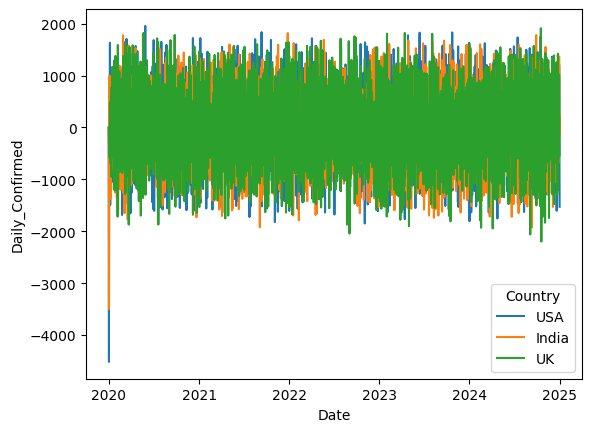

In [28]:
sns.lineplot(data=df1,x='Date',y='Daily_Confirmed',hue='Country')

In [29]:
df2=df1.groupby(['Date','Country'])['Confirmed_Cases'].value_counts().reset_index()

In [30]:
df2

,Date,Country,Confirmed_Cases,count
0,2020-01-01,India,4550,1
1,2020-01-01,UK,2683,1
2,2020-01-01,USA,5261,1
3,2020-01-02,India,1053,1
4,2020-01-02,UK,2446,1
...,...,...,...,...
5476,2024-12-30,UK,2307,1
5477,2024-12-30,USA,1782,1
5478,2024-12-31,India,1893,1
5479,2024-12-31,UK,1764,1


# A BAR CHART COMPARING TOTAL CONFIRMED CASES FOR THE TOP 5 COUNTRIES

<Axes: xlabel='Country'>

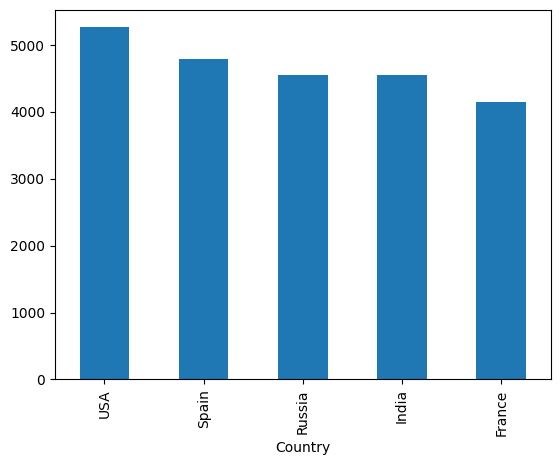

In [31]:
df.groupby('Country')['Confirmed_Cases'].max().sort_values(ascending=False).head(5).plot(kind='bar')

# A PIE CHART SHOWING THE PROPORTION OF ACTIVE CASES, DEATHS, AND RECOVERIES FOR A SPECIFIC COUNTRY.

In [32]:
df_india = df[(df['Country']=='India' )]

In [33]:
df_india.head()

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Fatality_Rate,Recovery_Rate
1827,2020-01-01,India,4550,48,3937,564,8163,0.0,0.0,0.0,1.054945,86.527473
1828,2020-01-02,India,1053,51,957,45,1219,-3497.0,3.0,-2980.0,4.843305,90.883191
1829,2020-01-03,India,49,1,42,4,65,-1004.0,-50.0,-915.0,2.040816,85.714286
1830,2020-01-04,India,1047,17,995,35,1434,998.0,16.0,953.0,1.623687,95.033429
1831,2020-01-05,India,1020,28,834,157,1680,-27.0,11.0,-161.0,2.745098,81.764706


Text(0.5, 1.0, 'Proportion of Cases in India')

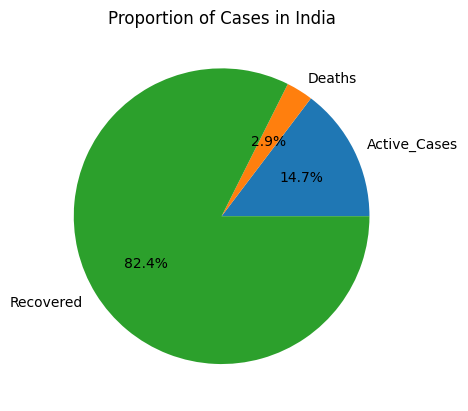

In [34]:
df_india[['Active_Cases', 'Deaths', 'Recovered']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title(f'Proportion of Cases in India')

# SCATTER PLOT TO ANALYZE RELATIONSHIP BETWEEN TESTS CONDUCTED AND CONFIRMED CASES

In [35]:
df_new=df[['Tests_Conducted','Confirmed_Cases']].reset_index()

In [36]:
df_new

,index,Tests_Conducted,Confirmed_Cases
0,0,8132,5261
1,1,1451,742
2,2,2094,1519
3,3,444,321
4,4,464,401
...,...,...,...
18265,18265,2545,1368
18266,18266,1002,824
18267,18267,2657,2003
18268,18268,945,833


In [37]:
df_new = df[['Tests_Conducted','Confirmed_Cases']].reset_index()

In [38]:
df_new

,index,Tests_Conducted,Confirmed_Cases
0,0,8132,5261
1,1,1451,742
2,2,2094,1519
3,3,444,321
4,4,464,401
...,...,...,...
18265,18265,2545,1368
18266,18266,1002,824
18267,18267,2657,2003
18268,18268,945,833


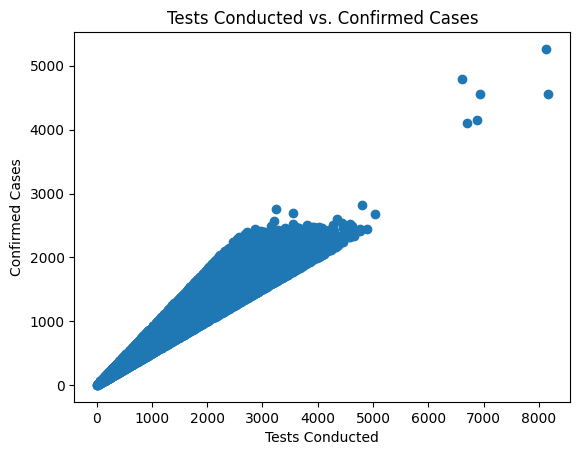

In [39]:
plt.scatter(df_new['Tests_Conducted'],df_new['Confirmed_Cases'])
plt.title('Tests Conducted vs. Confirmed Cases')
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.show()

In [40]:
df_india.head()

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Fatality_Rate,Recovery_Rate
1827,2020-01-01,India,4550,48,3937,564,8163,0.0,0.0,0.0,1.054945,86.527473
1828,2020-01-02,India,1053,51,957,45,1219,-3497.0,3.0,-2980.0,4.843305,90.883191
1829,2020-01-03,India,49,1,42,4,65,-1004.0,-50.0,-915.0,2.040816,85.714286
1830,2020-01-04,India,1047,17,995,35,1434,998.0,16.0,953.0,1.623687,95.033429
1831,2020-01-05,India,1020,28,834,157,1680,-27.0,11.0,-161.0,2.745098,81.764706


# PERFORM TIME-SERIES ANALYSIS TO PREDICT FUTURE CASE TRENDS USING OBSERVED PATTERNS.





In [41]:
pip install statsmodels


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
df_india= df_india.sort_values('Date').reset_index()

In [44]:
df_india.head()

,index,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Fatality_Rate,Recovery_Rate
0,1827,2020-01-01,India,4550,48,3937,564,8163,0.0,0.0,0.0,1.054945,86.527473
1,1828,2020-01-02,India,1053,51,957,45,1219,-3497.0,3.0,-2980.0,4.843305,90.883191
2,1829,2020-01-03,India,49,1,42,4,65,-1004.0,-50.0,-915.0,2.040816,85.714286
3,1830,2020-01-04,India,1047,17,995,35,1434,998.0,16.0,953.0,1.623687,95.033429
4,1831,2020-01-05,India,1020,28,834,157,1680,-27.0,11.0,-161.0,2.745098,81.764706


In [45]:
df_ts=df_india['Confirmed_Cases']

In [46]:
df_ts

0       4550
1       1053
2         49
3       1047
4       1020
        ... 
1822     643
1823     474
1824    1844
1825    1698
1826    1893
Name: Confirmed_Cases, Length: 1827, dtype: int64

In [57]:
model = ARIMA(df_ts, order = (1, 1, 1))

In [58]:
model_fit = model.fit()

In [59]:
forecast =  model_fit.forecast(steps = 30)

In [60]:
forecast

1827    1274.551137
1828    1182.108576
1829    1168.290736
1830    1166.225317
1831    1165.916588
1832    1165.870441
1833    1165.863543
1834    1165.862512
1835    1165.862358
1836    1165.862335
1837    1165.862332
1838    1165.862331
1839    1165.862331
1840    1165.862331
1841    1165.862331
1842    1165.862331
1843    1165.862331
1844    1165.862331
1845    1165.862331
1846    1165.862331
1847    1165.862331
1848    1165.862331
1849    1165.862331
1850    1165.862331
1851    1165.862331
1852    1165.862331
1853    1165.862331
1854    1165.862331
1855    1165.862331
1856    1165.862331
Name: predicted_mean, dtype: float64

In [61]:
forecast_dates = pd.date_range(df_ts.index[-1], periods=30, freq='D')

In [62]:
forecast_dates

DatetimeIndex(['1970-01-01 00:00:00.000001826',
               '1970-01-02 00:00:00.000001826',
               '1970-01-03 00:00:00.000001826',
               '1970-01-04 00:00:00.000001826',
               '1970-01-05 00:00:00.000001826',
               '1970-01-06 00:00:00.000001826',
               '1970-01-07 00:00:00.000001826',
               '1970-01-08 00:00:00.000001826',
               '1970-01-09 00:00:00.000001826',
               '1970-01-10 00:00:00.000001826',
               '1970-01-11 00:00:00.000001826',
               '1970-01-12 00:00:00.000001826',
               '1970-01-13 00:00:00.000001826',
               '1970-01-14 00:00:00.000001826',
               '1970-01-15 00:00:00.000001826',
               '1970-01-16 00:00:00.000001826',
               '1970-01-17 00:00:00.000001826',
               '1970-01-18 00:00:00.000001826',
               '1970-01-19 00:00:00.000001826',
               '1970-01-20 00:00:00.000001826',
               '1970-01-21 00:00:00.0000

In [63]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Cases': forecast})

In [66]:
forecast_df.head()

,Date,Forecasted_Cases
1827,1970-01-01 00:00:00.000001826,1274.551137
1828,1970-01-02 00:00:00.000001826,1182.108576
1829,1970-01-03 00:00:00.000001826,1168.290736
1830,1970-01-04 00:00:00.000001826,1166.225317
1831,1970-01-05 00:00:00.000001826,1165.916588


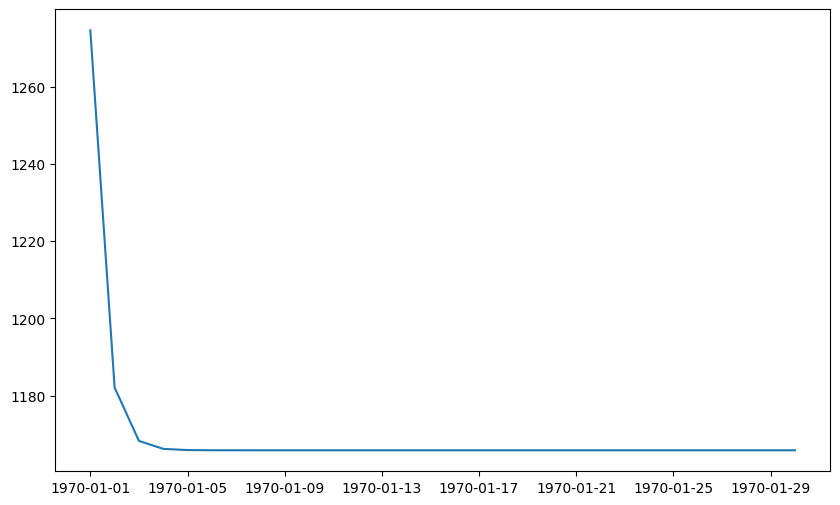

In [67]:
plt.figure(figsize=(10,6))
plt.plot(forecast_df['Date'],forecast_df['Forecasted_Cases'])